In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modern portfolio theory

A teoria moderna de portifolio é regida por quatro principios básicos. 

O primeiro se trata do Binômio Risco-retorno inicialmente estudado por Markowitz em 1952. O principio nos diz que **decisões de investimento devem ser tomadas com base na relação risco-retorno.**

O segundo principio foi estudado por James Tobin em 1958 e nos diz que a **alocação ótima de capital é uma combinação entre o atito livro de risco e o portifólio de mercado.**

Onde o ativo livro de risco é um conceito teórico de um ativo em que o seu retorno tem valor positivo e fixo, além disso possui risco zero associado. No mundo real esse ativo é representado pelos titulos de tesouro governamental. No Brasil, a Selic. 

O portifolio de mercado é um portifolio teórico composto por todos os ativos da economia. No mundo real o portifolio de mercado de cada investidor é composto por poucos ativos. 

O terceiro principio foi estudado por Sharpe e é o do retorno ajustado ao risco. Nos diz que o **portifólio ótimo é aquele que maximiza a relação entre o retorno em excesso e o risco do portifolio.**

Por ultimo, existe o axioma das preferências racionais. Onde a **alocação ótima de capital depende do seu apetite por risco e preferências associadas.**



### Fronteira eficiente

Para o caso de dois ativos com risco, existe uma fronteira que representa o relacionamento ótimo entre o retorno e o risco do portifolio. 

Considerando que r1 e r2 são os retornos de dois ativos com risco

$$ r_{i} \sim N ( \mu_{i}, \sigma_{i}^2) $$ 

Onde w1 e w2 são as frações investidas nos respectivos ativos.

$$ w_{1} + w_{2} = 1 \tag{1}$$

Logo, o retorno do portifolio é dado por

$$ r_{p} = w_{1}*r_{1} + w_{2}*r_{2} $$

$$ r_{p} \sim N(\mu_{p}, \sigma_{p}^2) $$

O calculo da média por:

$$ E[r_{p}] = w_{1}*E[r_{1}] + w_{2}*E[r_{2}] $$

$$ \mu_{p} = w_{1}*\mu_{1} + w_{2}*\mu_{2} \tag{2}$$

E o calculo da variância por:

$$ Var[r_{p}] = Var[w_{1}r_{1} + w_{2}r_{2}] $$

$$ Var[r_{p}] = Var[w_{1}r_{1}] + Var[w_{2}r_{2}] + 2Cov(w_{1}r_{1},w_{2}r_{2}) $$

$$ Var[r_{p}] = w_{1}^2Var[r_{1}] + w_{2}^2Var[r_{2}] + 2w_{1}w_{2}Cov(r_{1},r_{2}) $$

$$ \rho_{12} = \frac{Cov(r_{1}, r_{2})}{\sigma_{1}\sigma_{2}} \tag{3}$$

$$ \sigma_{p}^2 = w_{1}^2\sigma_{1}^2 + w_{2}^2\sigma_{2}^2 + 2w_{1}w_{2}\sigma_{1}\sigma_{2}\rho_{12} \tag{4}$$

Usando as equações (1) e (2), chega-se a:

$$ w_{1} = \frac{\mu_{p}-\mu_{2}}{\mu_{1}-\mu_{2}} \tag{5}$$
$$ w_{2} = \frac{\mu_{1}-\mu_{p}}{\mu_{1}-\mu_{2}} \tag{6}$$

Utilizando 4 e as ultimas 5 e 6 chega-se a uma equação que relaciona o retorno do portifolio e o desvio padrão.

Para o exercicio proposto, tem-se um portifolio composto de 3 ativos, 2 ativos de risco e um risk-free. Os dados são:

$$ r_{f} = 5\% a.a $$
$$ r_{1} \sim N(\mu_{1}, \sigma_{1}^2) $$
$$ r_{2} \sim N(\mu_{2}, \sigma_{2}^2) $$
Onde:
$ \mu_{1} = 12\% $, $ \sigma_{1}^2 = 9\% $
e
$ \mu_{2} = 25\% $, $ \sigma_{2}^2 = 25\% $

In [69]:
#atribuição dos valores das variaveis
u1 = 0.12
var1 = 0.09

u2 = 0.25
var2 = 0.25

rho = 0.25

u = [u1, u2]

var = [var1, var2]

r_f = 0.05

risk_aversion = 2.85

In [70]:
#Defined by equations (5) and (6)

def weights_by_asset(u, u_p):
    w_1 = (u_p-u[1])/(u[0]-u[1])
    w_2 = (u[0]-u_p)/(u[0]-u[1])
    
    return w_1, w_2

In [71]:
#Defined by equation (4)

def variance_for_two_assets(w_1, w_2, var_1, var_2, rho):
    return (w_1**2)*var_1 + (w_2**2)*var_2 + 2*w_1*w_2*np.sqrt(var_1*var_2)*rho

In [72]:
# Construção da fronteira eficiente para os ativos de risco
# dado a correlação entre eles, variância e média de cada um
def efficient_frontier(u, var, rho):
    std = []
    var_1 = var[0]
    var_2 = var[1]
    upaxis = np.linspace(0, 0.3, 100)
    for u_p in upaxis:
        w_1, w_2 = weights_by_asset(u, u_p)
        std.append(np.sqrt(variance_for_two_assets(w_1, w_2, var_1, var_2, rho)))

    return np.array(std), upaxis.T

In [75]:
std_p, u_p = efficient_frontier(u, var, rho)

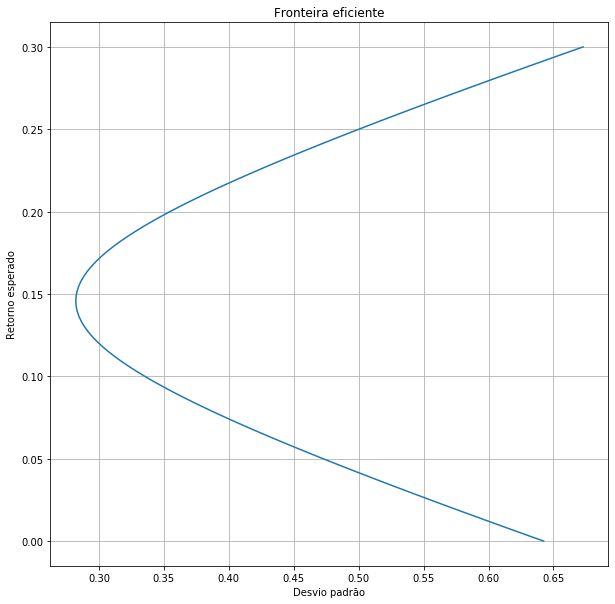

In [74]:
plt.figure(figsize=(10,10))
plt.title('Fronteira eficiente')
plt.plot(std_p, u_p)
plt.xlabel('Desvio padrão')
plt.ylabel('Retorno esperado')
plt.grid()
plt.show()

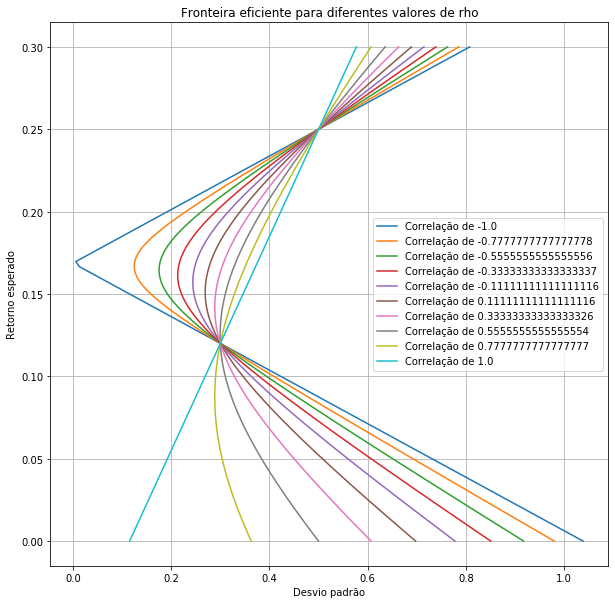

In [8]:
plt.figure(figsize=(10,10))
for rho_ in np.linspace(-1, 1, 10):
    std_p, u_p = efficient_frontier(u, var, rho_)
    plt.plot(std_p, u_p, label=f'Correlação de {rho_}')
plt.title('Fronteira eficiente para diferentes valores de rho')
plt.xlabel('Desvio padrão')
plt.ylabel('Retorno esperado')
plt.legend()
plt.grid()
plt.show()

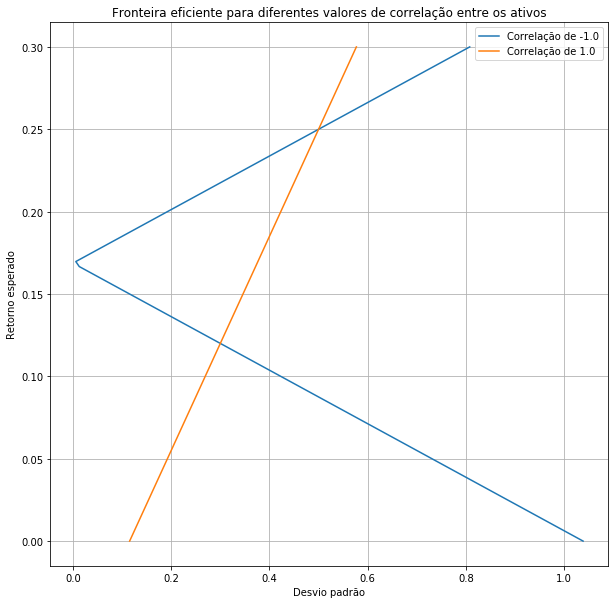

In [9]:
plt.figure(figsize=(10,10))
for rho_ in np.linspace(-1, 1, 2):
    std_p, u_p = efficient_frontier(u, var, rho_)
    plt.plot(std_p, u_p, label=f'Correlação de {rho_}')
plt.title('Fronteira eficiente para diferentes valores de correlação entre os ativos')
plt.xlabel('Desvio padrão')
plt.ylabel('Retorno esperado')
plt.grid()
plt.legend()
plt.show()

Nota-se para os dois casos interessantes de correlação entre os dois ativos que:

Para os dois ativos totalmente correlacionados negativamente (rho = -1), o desvio padrão chega a zero trazendo um retorno positivo, ao mesmo tempo. 

Para o caso dos altivos perfeitamente correlacionados (rho = 1) não existe muita vantagem na diversificação, dado que a curva da fronteira eficiente se degenera numa unica reta. 

Nota-se que a medida que os dois ativos se tornam cada vez mais correlacionados negativamente (rho tendendo a -1), o desvio padrão do portifolio diminui, comprovando o principio da diversificação.

O portifolio de dois ativos de correlação -1 possui um retorno esperado para uma variância zero e que pode ser calculado assumindo $ \sigma_{p} = 0 $ na equação (4). Fazer as devidas substituições com a equação (5) e (6), que nos leva a:

$$ \mu_{p} = \frac{\mu_{1}*\sigma_{2} + \mu_{2}*\sigma_{2}}{\sigma_{1}+\sigma_{2}} \tag{7}$$

**Esse portifolio é conhecido como portifolio de risco zero**. 

Seguindo na linha em que um portifolio que traga um retorno positivo com menor risco possivel associado a ele seja o que um gestor de investimentos busca. O portifolio em questão pode ser encontrado através da fronteira eficiente também.

Basta fazer:
$$ min( \sigma_{p}^2) =  d(\sigma_{p}^2)/d(\mu) = 0 $$

O que nos dá:

$$ \mu_{p}^* = \frac{\mu_{1}\sigma_{2}^2 + \mu_{2}\sigma_{1}^2 - (\mu_{1}+\mu_{2})\sigma_{1}\sigma_{2}\rho_{12}}{\sigma_{1}^2+\sigma_{2}^2-2\sigma_{1}\sigma_{2}\rho_{12}} \tag{8}$$ 

**Esse portifolio é conhecido como portifolio de variância minima.** Cuja alocação ótima é dada por:

$$ w_{1}^* = \frac{\mu_{p}^*-\mu_{2}}{\mu_{1}-\mu_{2}} \tag{9}$$

$$ w_{2}^* = \frac{\mu_{1}-\mu_{p}^*}{\mu_{1}-\mu_{2}} \tag{10}$$

É imoportante lembrar que o portifolio de variância minima:

- representa o inicio da fronteira eficiente
- representa o portifolio de menor risco
- não tem nenhuma relação com a taxa livre de risco
- não depende das preferências de risco do investidor

In [10]:
def u_for_minimal_variance(u, var, rho):
    numerator = u[0]*var[1]+u[1]*var[0] - (u[0]+u[1])*np.sqrt(var[0]*var[1])*rho
    denominator = var[0] + var[1] - 2*np.sqrt(var[0]*var[1])*rho
    
    optimal_u = numerator/denominator

    return optimal_u

In [11]:
u_for_minimal_variance(u, var, rho)

0.1457547169811321

**Indice de Sharpe mede o excedente de retorno em relação ao ativo livre de risco em por unidade de risco assumido no portifolio.**

$$ Sharpe = \frac{\mu_{p}-r_{f}}{\sigma_{p}} $$

É uma métrica bastante utilizada para comparar a performance entre portifolios. Vale a pena notar também que o portifolio de variância minima também tem o menor indice de Sharpe, que não necessariamente é o ideal ou que buscamos. 

O que se deseja é a maximização do indice de Sharpe pois isso significa um retorno excedente sobre a taxa livre de risco que é maximo para um risco minimo. 

Para calcular o indice de Sharpe ótimo (o maior possivel) resolve-se a equação abaixo. **O portifolio de ativos de risco construido a partir do maior indice de Sharpe é chamado de portifolio tangente.**

$$ max(S_{p}) = \frac{d}{d\mu_{p}}(\frac{\mu_{p}-r_{f}}{\sigma_{p}}) = 0 $$

A solução fica de exercicio para o leitor.

É importante lembrar que o portifolio tangente:
- Representa o portifolio ótimo (segundo Sharpe) dos ativos com risco
- Depende da taxa livre de risco
- Não depende das preferências de risco do investidor

In [12]:
def u_for_minimal_variance(u, var, rho, r_f):
    difference_between_u = (u[0]-u[1])**2
    beta_parabola = -2*(u[0]*var[1]+u[1]*var[0] - (u[0]+u[1])*np.sqrt(var[0]*var[1])*rho)/difference_between_u
    alpha_parabola = (var[0] + var[1] - 2*np.sqrt(var[0]*var[1])*rho)/difference_between_u
    gamma_parabola = ((u[0]**2)*var[1]+(u[1]**2)*var[0] - 2*(u[0]*u[1])*np.sqrt(var[0]*var[1])*rho)/difference_between_u
    optimal_u = -(beta_parabola*r_f + 2*gamma_parabola)/(2*alpha_parabola*r_f+beta_parabola)
    
    return optimal_u

In [13]:
u_for_minimal_variance(u, var, rho, 0.05)

0.19876847290640395

No mundo real, a alocação otima de capital depende do perfil de risco do investidor. Portanto, **o portifolio geral do investidor é composto por apenas dois ativos: o ativo livre de risco e o portifolio tangente.** A linha de alocação de capital (LAC) é a fronteira eficiente para o portifolio geral do investidor. 

Pelo principio 4 e teoria das preferências (microeconomia), o perfil de risco do investidor pode ser modelado pela teoria da utilidade U(x) que simboliza a utilidade fornecida por um retorno, variancia e um parametro de aversão a risco.

A função de utilidade quadratica abaixo é a mais utilizada:

$$ U = \mu_{g} - \frac{1}{2}\gamma\sigma_{g}^2 $$

Onde $ \gamma $ é o coeficiente de aversão a risco do investidor e possui um valor tipico de 2.85

In [14]:
def var_for_minimal_variance(u, var, rho, r_f):
    u_p = u_for_minimal_variance(u, var, rho, r_f)
    w_1, w_2 = weights_by_asset(u, u_p)
    var_p = variance_for_two_assets(w_1, w_2, var[0], var[1], rho)
    return var_p

In [15]:
var_for_minimal_variance(u, var, rho, r_f)

0.12366837341357474

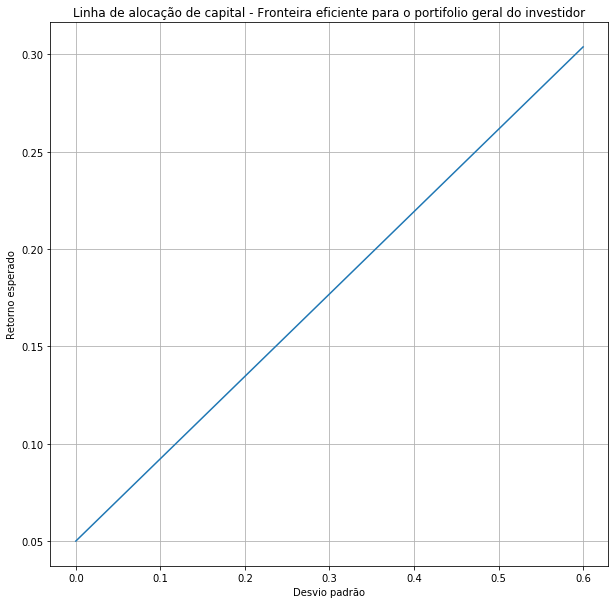

In [90]:
plt.figure(figsize=(10,10))
u_lac = []
std_axis = []
u_p = u_for_minimal_variance(u, var, rho, r_f)
var_p = var_for_minimal_variance(u, var, rho, r_f)
for std_ in np.linspace(0, 0.6, 200):
    std_axis.append(std_)
    a = (u_p - r_f)/np.sqrt(var_p)
    u_lac.append(a*std_+r_f)
    lac = std_axis, u_lac
plt.plot(lac[0], lac[1])
plt.title('Linha de alocação de capital - Fronteira eficiente para o portifolio geral do investidor')
plt.xlabel('Desvio padrão')
plt.ylabel('Retorno esperado')
plt.grid()
plt.show()

In [32]:
def utility_function(u, var, gamma):
    
    return u - (1/2)*gamma*var

In [95]:
lac_df = pd.concat([pd.DataFrame(lac[0], columns=['std']), pd.DataFrame(lac[1], columns=['u'])], axis=1)
lac_df['utility'] = (lac_df.apply(lambda x: utility_function(x['u'], x['std']**2, risk_aversion), axis=1))
max_utility = lac_df.utility.max()
lac_df[lac_df.utility==max_utility]

,std,u,utility
49,0.147739,0.112499,0.081396


In [53]:
print(f'A curva que nos dá a maior utilidade é dada pela utilidade: {max_utility}')

A curva que nos dá a maior utilidade é dada pela utilidade: 0.08139700752477735


In [50]:
def inverse_utility_function(max_utility, var, gamma):
    return max_utility + (1/2)*gamma*var

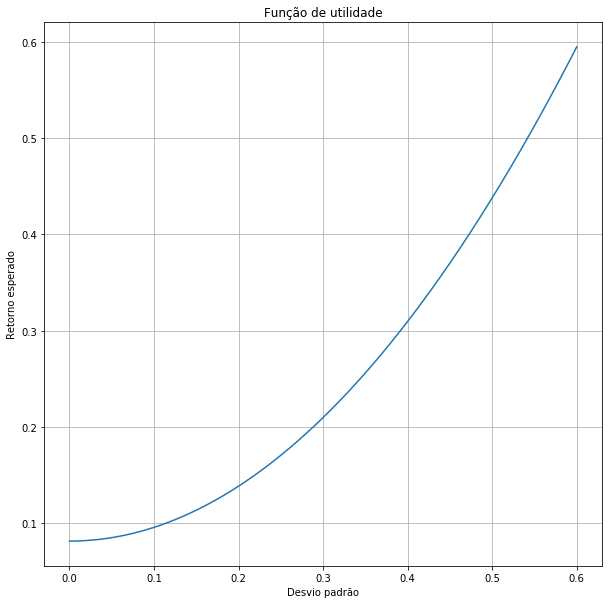

In [86]:
plt.figure(figsize=(10,10))
u_preference = []
std_axis = []
for std_ in np.linspace(0, 0.6, 200):
    std_axis.append(std_)
    u_preference.append(inverse_utility_function(max_utility, std_**2, risk_aversion))
plt.plot(std_axis, u_preference)
plt.title('Função de utilidade')
plt.xlabel('Desvio padrão')
plt.ylabel('Retorno esperado')
plt.grid()
plt.show()

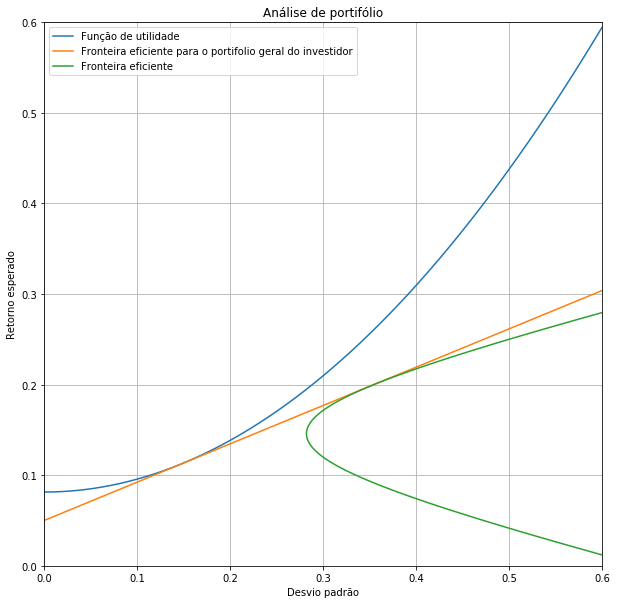

In [98]:
plt.figure(figsize=(10,10))
plt.plot(std_axis, u_preference, label='Função de utilidade')
plt.plot(lac[0], lac[1], label='Fronteira eficiente para o portifolio geral do investidor')
std_p, u_p = efficient_frontier(u, var, rho)
plt.plot(std_p, u_p, label='Fronteira eficiente')
plt.xlim([0, 0.6])
plt.ylim([0, 0.6])
plt.legend()
plt.title('Análise de portifólio')
plt.xlabel('Desvio padrão')
plt.ylabel('Retorno esperado')
plt.grid()
plt.show()